# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [55]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [56]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 562


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [57]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?&appid={weather_api_key}&units=metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-vila
Processing Record 2 of Set 1 | anloga
Processing Record 3 of Set 1 | bethel
Processing Record 4 of Set 1 | laguna
Processing Record 5 of Set 1 | grytviken
Processing Record 6 of Set 1 | xianyang
Processing Record 7 of Set 1 | enewetak
Processing Record 8 of Set 1 | bull savanna
Processing Record 9 of Set 1 | invercargill
Processing Record 10 of Set 1 | waitangi
Processing Record 11 of Set 1 | otra banda
Processing Record 12 of Set 1 | vernon
Processing Record 13 of Set 1 | aasiaat
Processing Record 14 of Set 1 | illizi
Processing Record 15 of Set 1 | la passe
Processing Record 16 of Set 1 | hondo
Processing Record 17 of Set 1 | port elizabeth
Processing Record 18 of Set 1 | albany
Processing Record 19 of Set 1 | graaff-reinet
Processing Record 20 of Set 1 | talnakh
Processing Record 21 of Set 1 | scottburgh
Processing Record 22 of Set 1 | hermanus
Processing Record 23 of Set 1 | yellowk

In [58]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          536
Lat           536
Lng           536
Max Temp      536
Humidity      536
Cloudiness    536
Wind Speed    536
Country       536
Date          536
dtype: int64

In [59]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-vila,-17.7338,168.3219,24.78,78,100,5.14,VU,1698716132
1,anloga,5.7947,0.8973,27.74,78,23,2.15,GH,1698716320
2,bethel,41.3712,-73.4140,10.42,82,100,2.57,US,1698716320
3,laguna,38.4210,-121.4238,19.10,37,0,2.06,US,1698716321
4,grytviken,-54.2811,-36.5092,2.96,81,83,2.95,GS,1698716321


In [60]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [61]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-vila,-17.7338,168.3219,24.78,78,100,5.14,VU,1698716132
1,anloga,5.7947,0.8973,27.74,78,23,2.15,GH,1698716320
2,bethel,41.3712,-73.4140,10.42,82,100,2.57,US,1698716320
3,laguna,38.4210,-121.4238,19.10,37,0,2.06,US,1698716321
4,grytviken,-54.2811,-36.5092,2.96,81,83,2.95,GS,1698716321


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

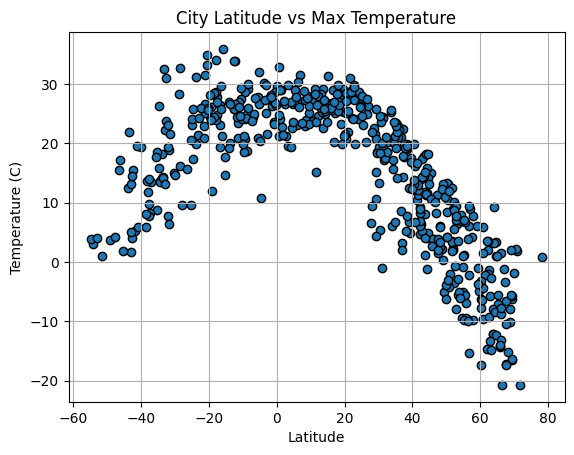

In [78]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], marker = 'o', edgecolor='black')

# Incorporate the other graph properties
plt.title("City Latitude vs Max Temperature")
plt.ylabel("Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

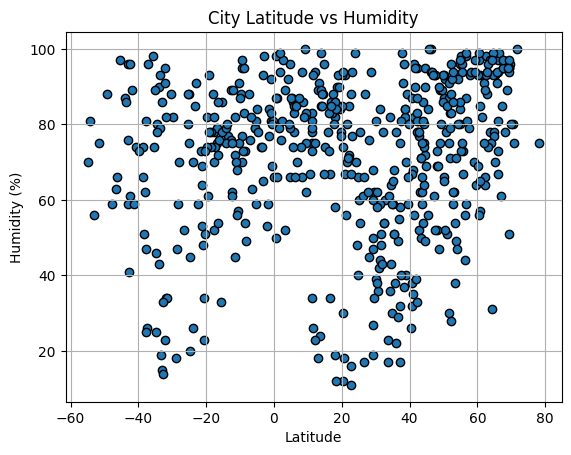

In [79]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], marker = 'o', edgecolor='black')


# Incorporate the other graph properties
plt.title("City Latitude vs Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

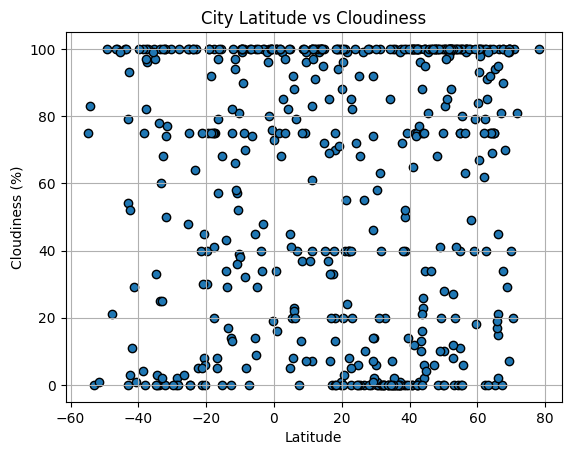

In [80]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], marker = 'o', edgecolor='black')


# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

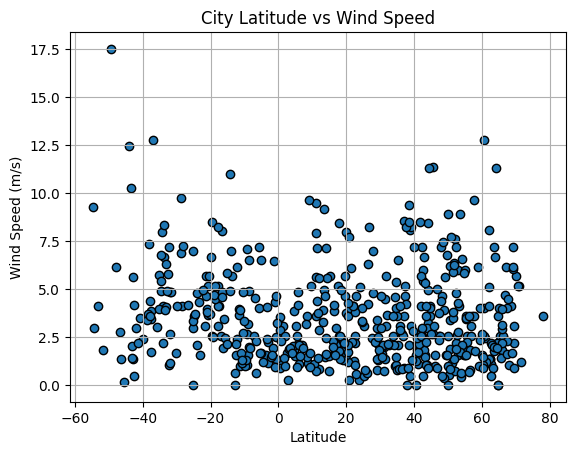

In [81]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], marker = 'o', edgecolor='black')

# Incorporate the other graph properties
plt.title("City Latitude vs Wind Speed")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [82]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot the scatterplot 
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [83]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,anloga,5.7947,0.8973,27.74,78,23,2.15,GH,1698716320
2,bethel,41.3712,-73.4140,10.42,82,100,2.57,US,1698716320
3,laguna,38.4210,-121.4238,19.10,37,0,2.06,US,1698716321
5,xianyang,34.3378,108.7026,15.58,82,85,1.00,CN,1698716237
6,enewetak,11.3474,162.3373,27.73,83,100,7.13,MH,1698716322


In [84]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-vila,-17.7338,168.3219,24.78,78,100,5.14,VU,1698716132
4,grytviken,-54.2811,-36.5092,2.96,81,83,2.95,GS,1698716321
8,invercargill,-46.4000,168.3500,17.23,66,100,1.34,NZ,1698716323
9,waitangi,-43.9535,-176.5597,12.49,87,100,12.48,NZ,1698716323
16,port elizabeth,-33.9180,25.5701,14.16,90,0,4.12,ZA,1698716325


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7728526947386808


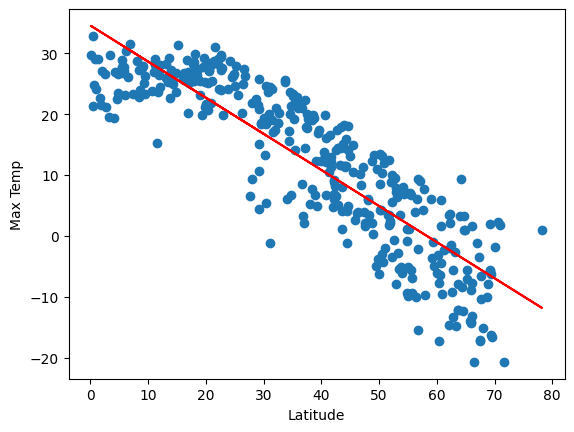

In [85]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp',(-40,40))

The r-value is: 0.49165820391744824


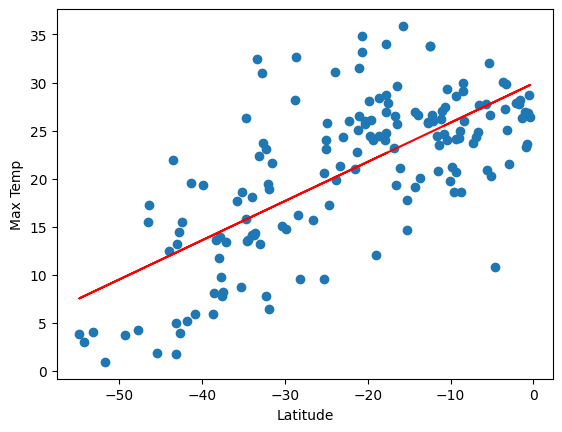

In [86]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp',(-40,40))

**Discussion about the linear relationship:** The further you are from the equator the lower the temperature will be and max temperature is around 36. It is also noticable that the northern hemisphere is by far colder with temperature of -20 than the southern hemisphere due to sunlight exposure.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.023707262757786767


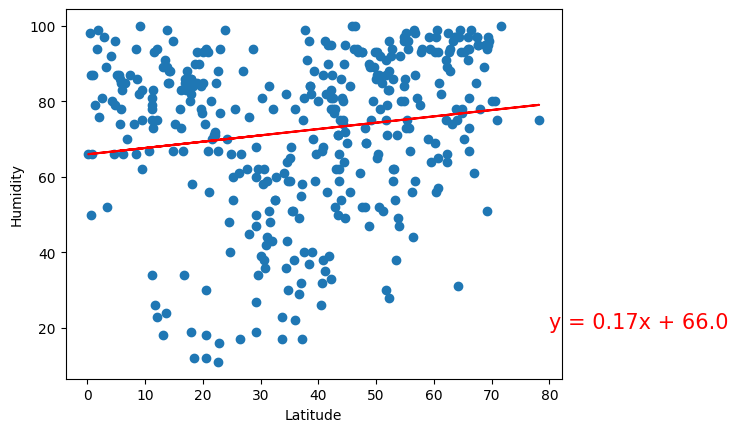

In [87]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity',(80,20))

The r-value is: 0.030770278494477003


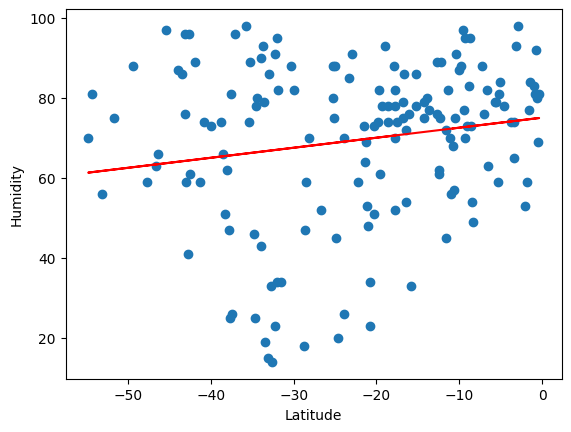

In [88]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity',(80,20))

**Discussion about the linear relationship:** The humidity shows an interesting trend on both the northern and southern hemisphere, in that when the temperature is above 73 the latitude does not seem to have a big impact on the humidity, but below the graph makes a v shape to the latitude of 25 and -25 respectively to each hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.009444287701723852


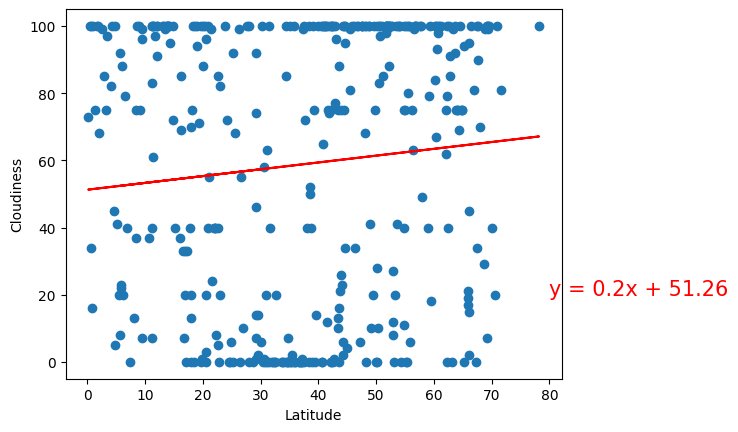

In [89]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness',(80,20))

The r-value is: 0.01088397143798282


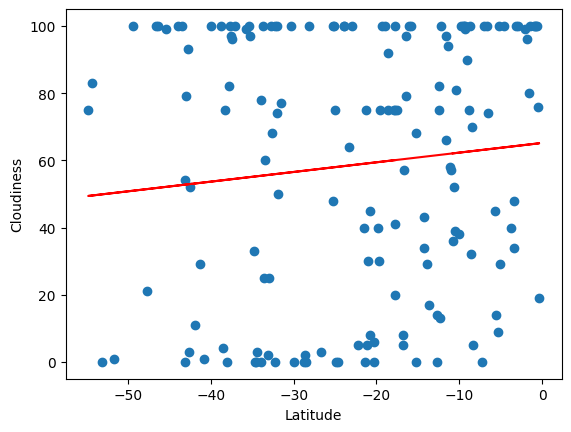

In [90]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness',(80,20))

**Discussion about the linear relationship:** The cloudiness is scattered all across both the northern and southern hemisphere with no trend showing with the relation of its latitude.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.004903413315815857


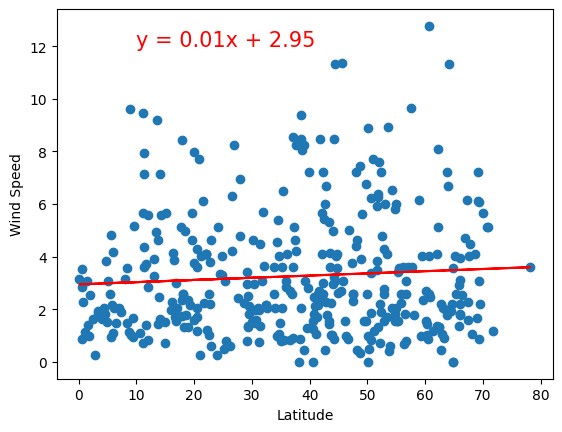

In [91]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed',(10,12))

The r-value is: 0.06784737628170186


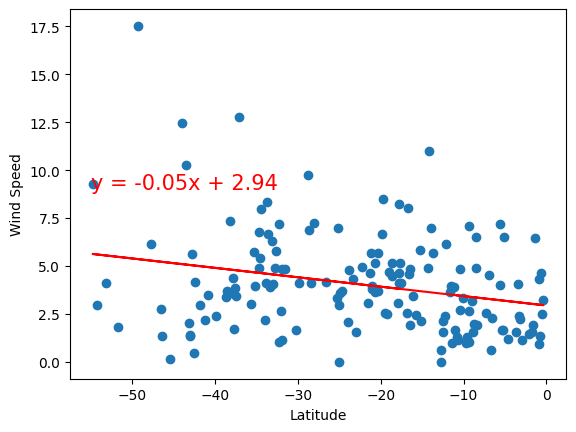

In [92]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed',(-55,9))

**Discussion about the linear relationship:** The wind speeeds are almost twice as fast of the southern hemisphere compared to the northern hemisphere with a very consistent average speeds of 3(k/h), besides that there is no corrolation between latitude and wind speeds.